In [59]:
import os
import subprocess
def number_of_clusters(filename):
    '''This function return the number of clusters of a CD-HIT cluster file'''
    
    #Use grep to count the number of '>Cluster', that is also the number of clusters
    c_line = "grep '>Cluster' " + filename + " | wc -l"
    num_clust = int(subprocess.check_output(c_line, shell=True)) 
    return int(num_clust)


def mean_of_clusters(filename):
    '''This function return the mean of clusters of a CD-HIT cluster file'''
    
    f = open(filename,'r')
    #clust dictionary will carry cluster names 
    #(cluster 0,cluster 1,cluster n) as keys 
    #and each value will be a list of sequences of that cluster
    clust_dict = {}
    for line in f:
        if '>' == line[0]:
            head = line
            clust_dict[head] = []
        else:
            clust_dict[head].append(line)
    #wwe sum the number of sequences in each cluster
    sum_num = 0
    for key in clust_dict.keys():
        sum_num += len(clust_dict[key])
    n_clust = number_of_clusters(filename)
    f.close()
    return float(sum_num/n_clust)

In [60]:
#Open a file that contains paths of each cluster
#this can be made with grep as follow:
# grep -l '>Cluster' ~/AS_Thesis_AMPSpiderSilk/clusters/*/*
clsts_filenames = open('clusters_filenames.txt','r')
data_sets = ['Parasteatodatepidariorum', 
             'Nephilaantipodiana', 
             'Leucaugevenusta_2', 
             'Leucaugevenusta', 
             'Steatodagrossa', 
             'Latrodectushesperus']
mean_table = {}
num_table = {}

#Determinate and save the number and mean of clusters for each data set
for file in clsts_filenames:
    specie = [sp for sp in data_sets if sp in file][0]
    mean_value = mean_of_clusters(file.rstrip())
    num_value = number_of_clusters(file.rstrip())
    if specie not in mean_table and specie not in num_table:
        mean_table[specie] = [0]*7
        num_table[specie] = [0]*7
    if '60' in file:
        mean_table[specie][0] = mean_value
        num_table[specie][0] = num_value
    elif '65' in file:
        mean_table[specie][1] = mean_value
        num_table[specie][1] = num_value
    elif '70' in file:
        mean_table[specie][2] = mean_value
        num_table[specie][2] = num_value
    elif '75' in file:
        mean_table[specie][3] = mean_value
        num_table[specie][3] = num_value
    elif '80' in file:
        mean_table[specie][4] = mean_value
        num_table[specie][4] = num_value
    elif '85' in file:
        mean_table[specie][5] = mean_value
        num_table[specie][5] = num_value
    elif '90' in file:
        mean_table[specie][6] = mean_value
        num_table[specie][6] = num_value
clsts_filenames.close()


In [61]:
#Mean table
print('{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}'.format(60,65,70,75,80,85,90,'specie'))
for key in mean_table.keys():
    print('{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}'.format(round(mean_table[key][0],3),round(mean_table[key][1],3),round(mean_table[key][2],3),round(mean_table[key][3],3),round(mean_table[key][4],3),round(mean_table[key][5],3),round(mean_table[key][6],3),key))

60	65	70	75	80	85	90	specie
1.189	1.161	1.15	1.14	1.119	1.094	1.056	Latrodectushesperus
1.187	1.171	1.171	1.141	1.141	1.127	1.113	Leucaugevenusta_2
1.245	1.245	1.245	1.245	1.2	1.179	1.138	Leucaugevenusta
1.41	1.362	1.351	1.306	1.27	1.228	1.161	Nephilaantipodiana
1.054	1.054	1.054	1.054	1.054	1.054	1.054	Parasteatodatepidariorum
1.085	1.062	1.062	1.062	1.062	1.062	1.062	Steatodagrossa


In [62]:
#Number table
print('{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}'.format(60,65,70,75,80,85,90,'specie'))
for key in num_table.keys():
    print('{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}'.format(round(num_table[key][0],3),round(num_table[key][1],3),round(num_table[key][2],3),round(num_table[key][3],3),round(num_table[key][4],3),round(num_table[key][5],3),round(num_table[key][6],3),key))

60	65	70	75	80	85	90	specie
206	211	213	215	219	224	232	Latrodectushesperus
75	76	76	78	78	79	80	Leucaugevenusta_2
53	53	53	53	55	56	58	Leucaugevenusta
363	376	379	392	403	417	441	Nephilaantipodiana
56	56	56	56	56	56	56	Parasteatodatepidariorum
47	48	48	48	48	48	48	Steatodagrossa


In [66]:
import matplotlib.pyplot as plt
def plot_dict(dictionary, x_values ,xlb='x axis', ylb='y axis', tl= 'Title'):
    '''This function plot the values of a dicionary with the same format
    key/legend:[yvalue1, yvalue2,...,yvaluen]
    each key will be a legend in the plot
    Requieres a dictionary, xlabel and ylabel
    '''
    for key in dictionary.keys():
        x = x_values
        y = dictionary[key]
        plt.plot(x,y,label=key)
    plt.xlabel(xlb)
    plt.ylabel(ylb)
    plt.title(tl)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
        
    

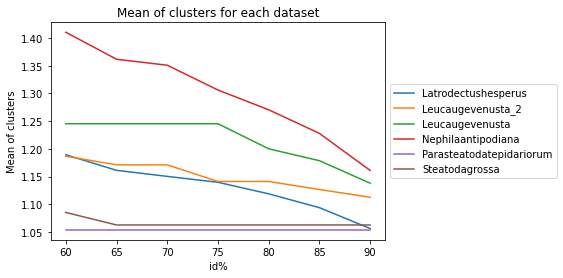

In [67]:
plot_dict(mean_table, list(range(60,91,5)), 'id%', 'Mean of clusters', 'Mean of clusters for each dataset')

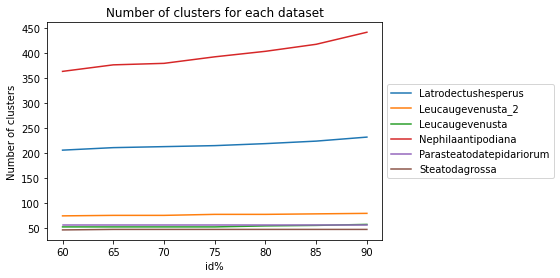

In [68]:
plot_dict(num_table, list(range(60,91,5)), 'id%', 'Number of clusters', 'Number of clusters for each dataset')